Daniel De Llanos	Z23758584
Spencer Levine Z23950071

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/Airline_Delay_Cause.csv')


In [2]:
total_nan_per_row = df.isna().sum()
total_nan = df.isna().sum().sum()
print(f"Total NaN per row: {total_nan_per_row}")
print(f"Total NaN values: {total_nan}")

Total NaN per row: year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64
Total NaN values: 7604


In [3]:
df.drop_duplicates()
df.shape

(318017, 21)

In [4]:
df.dtypes

year                     int64
month                    int64
carrier                    str
carrier_name               str
airport                    str
airport_name               str
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [5]:
df = df.dropna(subset=['carrier', 'carrier_name', 'airport'])
df.shape

(318010, 21)

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [7]:
total_nan_per_row = df.isna().sum()
total_nan = df.isna().sum().sum()
print(f"Total NaN per row: {total_nan_per_row}")
print(f"Total NaN values: {total_nan}")

Total NaN per row: year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
Total NaN values: 0


In [8]:
df.rename(columns = {'carrier' : 'carrier_code', 'airport': 'airport_code', 'arr_del15': 'total_delay_ct'}, inplace = True)
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [9]:
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df.dtypes

year                       str
month                      str
carrier_code               str
carrier_name               str
airport_code               str
airport_name               str
arr_flights            float64
total_delay_ct         float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [10]:
df['avg_delay'] = df['arr_delay'] / df['total_delay_ct']
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,36.428571
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,55.250000
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,69.000000
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,67.642857
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,42.526316


In [11]:
df['percent_delay'] = (df['total_delay_ct'] / df['arr_flights']) *100
df.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,36.428571,5.147059
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,55.250000,17.582418
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,69.000000,10.526316
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,67.642857,15.909091
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,42.526316,10.497238


In [12]:
condition = df['percent_delay'] < 100
df = df[condition]

In [13]:
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.           38027
Delta Air Lines Inc.            27545
ExpressJet Airlines Inc.        24468
American Airlines Inc.          19764
United Air Lines Inc.           19096
Southwest Airlines Co.          17576
American Eagle Airlines Inc.    15403
Mesa Airlines Inc.              14463
Alaska Airlines Inc.            12938
Frontier Airlines Inc.          12273
Atlantic Southeast Airlines     12150
JetBlue Airways                 11577
US Airways Inc.                 10689
Envoy Air                        8970
Northwest Airlines Inc.          8072
Comair Inc.                      7751
AirTran Airways Corporation      6953
Continental Air Lines Inc.       6893
Pinnacle Airlines Inc.           6426
Allegiant Air                    6375
Endeavor Air Inc.                5507
Republic Airline                 4429
PSA Airlines Inc.                4216
Spirit Air Lines                 3791
Hawaiian Airlines Inc.           3572
America West Airlines Inc.       1580

In [14]:
df['airport_name'].value_counts()

airport_name
Detroit, MI: Detroit Metro Wayne County         3021
Los Angeles, CA: Los Angeles International      2989
Las Vegas, NV: McCarran International           2974
Kansas City, MO: Kansas City International      2961
Pittsburgh, PA: Pittsburgh International        2949
                                                ... 
Kansas City, MO: Charles B. Wheeler Downtown       1
Greenville, MS: Greenville Mid Delta               1
Rapid City, SD: Ellsworth AFB                      1
Spokane, WA: Fairchild AFB                         1
Columbus, MS: Columbus AFB                         1
Name: count, Length: 419, dtype: int64

In [15]:
df_delta = df[df['carrier_name'] == 'Delta Air Lines Inc.']
df_delta.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
352,2022,5,DL,Delta Air Lines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",93.0,12.0,6.64,1.00,...,2.0,0.0,429.0,218.0,49.0,4.0,0.0,158.0,35.750000,12.903226
353,2022,5,DL,Delta Air Lines Inc.,ALB,"Albany, NY: Albany International",93.0,28.0,16.07,0.00,...,5.0,0.0,1374.0,602.0,0.0,199.0,0.0,573.0,49.071429,30.107527
354,2022,5,DL,Delta Air Lines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",215.0,25.0,17.90,0.00,...,2.0,1.0,958.0,676.0,0.0,63.0,0.0,219.0,38.320000,11.627907
355,2022,5,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18297.0,2573.0,1012.39,95.51,...,444.0,23.0,193784.0,102534.0,7741.0,19640.0,34.0,63835.0,75.314419,14.062415
356,2022,5,DL,Delta Air Lines Inc.,ATW,"Appleton, WI: Appleton International",31.0,3.0,2.00,0.00,...,0.0,0.0,109.0,89.0,0.0,20.0,0.0,0.0,36.333333,9.677419


In [16]:
df_FL = df[df['airport_code'].isin(['FLL', 'MIA'])]
df_FL.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
132,2022,5,AA,American Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",440.0,93.0,31.35,5.51,...,4.0,5.0,5739.0,1800.0,400.0,1482.0,8.0,2049.0,61.709677,21.136364
155,2022,5,AA,American Airlines Inc.,MIA,"Miami, FL: Miami International",4921.0,992.0,305.82,36.99,...,131.0,35.0,70257.0,25492.0,3678.0,16675.0,29.0,24383.0,70.823589,20.158504
233,2022,5,AS,Alaska Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",46.0,6.0,1.74,0.00,...,3.0,1.0,227.0,76.0,0.0,71.0,0.0,80.0,37.833333,13.043478
306,2022,5,B6,JetBlue Airways,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",1684.0,382.0,178.20,7.71,...,49.0,23.0,29494.0,14786.0,1008.0,3652.0,85.0,9963.0,77.209424,22.684086
317,2022,5,B6,JetBlue Airways,MIA,"Miami, FL: Miami International",333.0,72.0,43.78,0.00,...,7.0,3.0,5792.0,3467.0,0.0,1210.0,0.0,1115.0,80.444444,21.621622


In [17]:
df_jetblue = df[df['carrier_name'] == 'JetBlue Airways']
df_jetblue.head()

,year,month,carrier_code,carrier_name,airport_code,airport_name,arr_flights,total_delay_ct,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay,percent_delay
285,2022,5,B6,JetBlue Airways,ABQ,"Albuquerque, NM: Albuquerque International Sun...",31.0,9.0,5.20,0.00,...,0.0,0.0,408.0,213.0,0.0,21.0,0.0,174.0,45.333333,29.032258
286,2022,5,B6,JetBlue Airways,ACK,"Nantucket, MA: Nantucket Memorial",46.0,12.0,6.77,3.80,...,3.0,0.0,985.0,689.0,226.0,50.0,0.0,20.0,82.083333,26.086957
287,2022,5,B6,JetBlue Airways,ALB,"Albany, NY: Albany International",62.0,16.0,6.49,3.28,...,4.0,0.0,720.0,424.0,85.0,166.0,0.0,45.0,45.000000,25.806452
288,2022,5,B6,JetBlue Airways,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",196.0,43.0,27.67,1.40,...,3.0,0.0,3021.0,1645.0,161.0,240.0,0.0,975.0,70.255814,21.938776
289,2022,5,B6,JetBlue Airways,AUS,"Austin, TX: Austin - Bergstrom International",112.0,33.0,19.59,1.00,...,0.0,1.0,2304.0,1516.0,31.0,178.0,0.0,579.0,69.818182,29.464286


In [18]:
df['total_delay_ct'].describe()

count    317281.000000
mean         72.939577
std         198.927391
min           0.000000
25%           9.000000
50%          23.000000
75%          56.000000
max        6377.000000
Name: total_delay_ct, dtype: float64

In [19]:
df['arr_delay'].describe()

count    317281.000000
mean       4214.880837
std       12522.766565
min           0.000000
25%         441.000000
50%        1203.000000
75%        3083.000000
max      433687.000000
Name: arr_delay, dtype: float64

In [20]:
df.groupby(['airport_code'])['percent_delay'].mean()

airport_code
ABE    18.932134
ABI    19.041653
ABQ    18.982362
ABR    10.667118
ABY    19.061323
         ...    
XNA    18.796896
XWA    15.276848
YAK    17.821648
YKM    17.558150
YUM    14.018177
Name: percent_delay, Length: 419, dtype: float64

In [21]:
df_FL.groupby(['airport_code'])['percent_delay'].mean()

airport_code
FLL    21.376055
MIA    20.861924
Name: percent_delay, dtype: float64

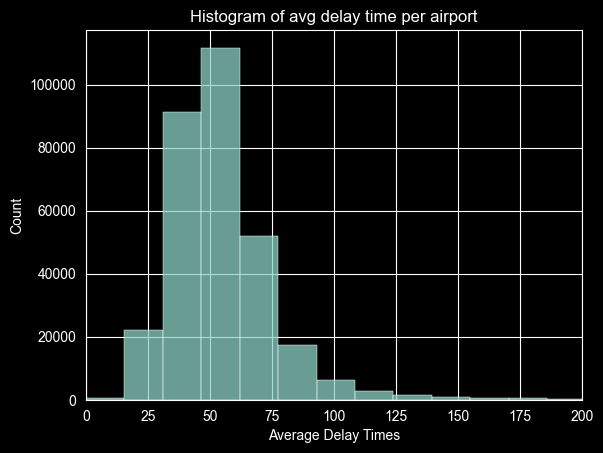

In [29]:
sns.histplot(data = df, x = 'avg_delay', bins = 100)
plt.xlim(0, 200)
plt.title('Histogram of avg delay time per airport')
plt.xlabel('Average Delay Times')
plt.show()

This histogram shows the average delay times across every airport in the data.  The data is slightly skewed to the right, and is important for our research to find a baseline for delay times across all airports in the data.

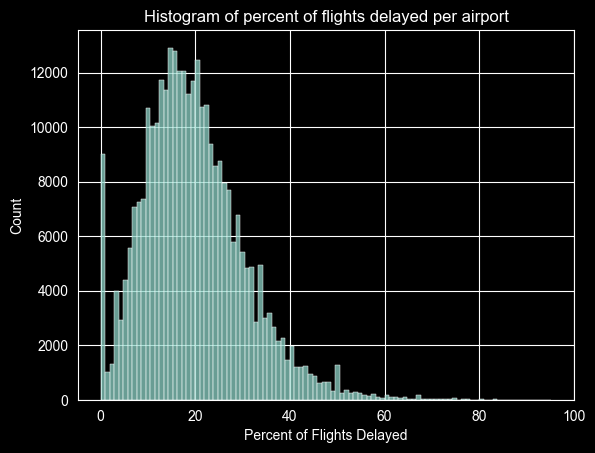

In [31]:
sns.histplot(data=df, x = 'percent_delay', bins = 100)
plt.title('Histogram of percent of flights delayed per airport')
plt.xlabel('Percent of Flights Delayed')
plt.show()

This histogram shows the amount of flights delayed across all airports every month in the dataset.  The data is slightly right skewed, and is important for our research to help find the distribution of flights delayed across all samples.

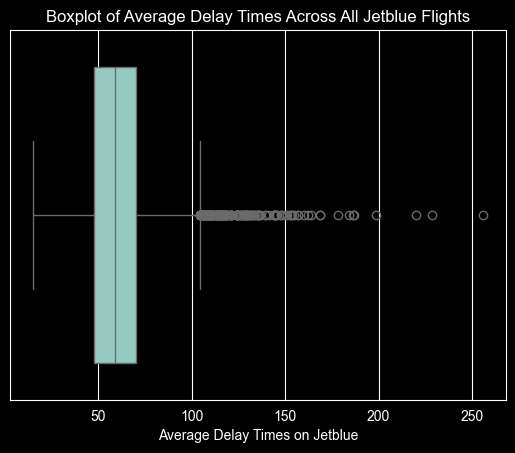

In [32]:
sns.boxplot(data = df_jetblue, x = 'avg_delay')
plt.title('Boxplot of Average Delay Times Across All Jetblue Flights')
plt.xlabel('Average Delay Times on Jetblue')
plt.show()

This boxplot shows the quartile range of delay times on Jetblue flights.  This will be important for our research to help compare Jetblue delays to delays on Delta.

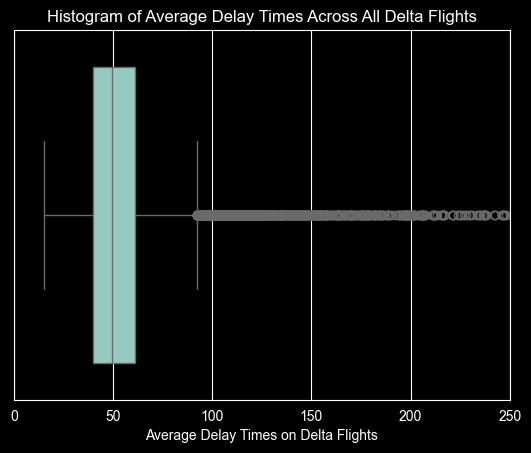

In [34]:
sns.boxplot(data = df_delta, x = 'avg_delay')
plt.title('Histogram of Average Delay Times Across All Delta Flights')
plt.xlabel('Average Delay Times on Delta Flights')
plt.xlim(0,250)
plt.show()

This boxplot is very similar to the one above, except this shows the quartile range of average delay times on Delta flights.   This will be used in conjunction with the boxplot for Jetblue delays to help compare the two airlines. 

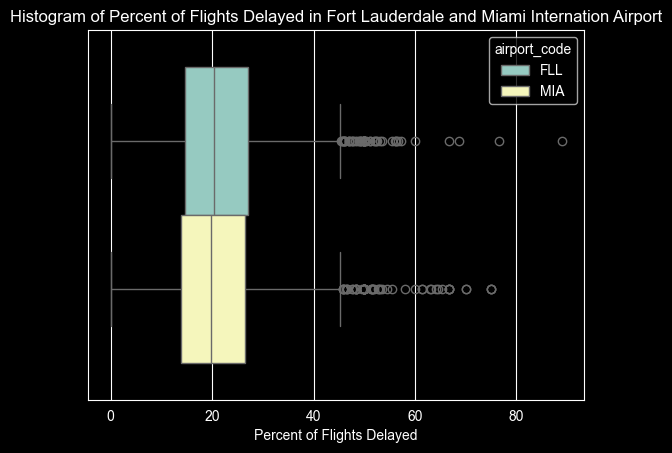

In [35]:
sns.boxplot(data= df_FL, x = 'percent_delay', hue='airport_code')
plt.title('Histogram of Percent of Flights Delayed in Fort Lauderdale and Miami Internation Airport')
plt.xlabel('Percent of Flights Delayed')
plt.show()

This boxplot shows the distribution of percent of delayed flights in both Fort Lauderdale (FLL) and Miami International (MIA) airports.  This chart is helpful for our ability to compare the differences between delay percentages in the two airports.

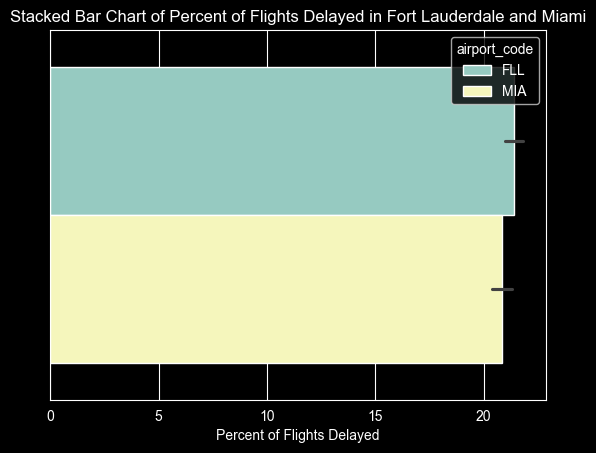

In [36]:
sns.barplot(data = df_FL, x = 'percent_delay', hue='airport_code')
plt.title('Stacked Bar Chart of Percent of Flights Delayed in Fort Lauderdale and Miami')
plt.xlabel('Percent of Flights Delayed')
plt.show()

This stacked bar chart is useful for comparing the raw numbers of percent delays of flights between FLL and MIA, without showing the distribution of the data.  This is useful to get a simple visualization of the comparison of delays.

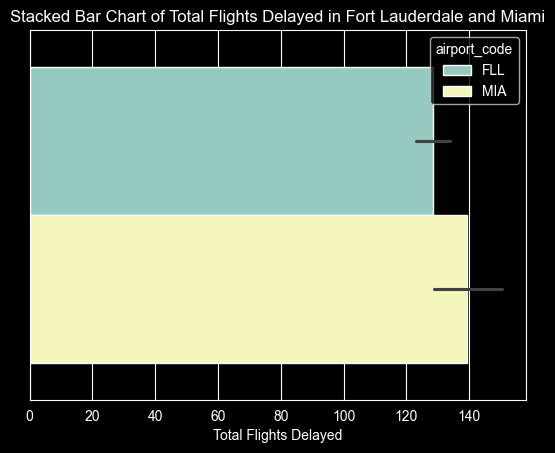

In [37]:
sns.barplot(data = df_FL, x = 'total_delay_ct', hue='airport_code')
plt.title('Stacked Bar Chart of Total Flights Delayed in Fort Lauderdale and Miami')
plt.xlabel('Total Flights Delayed')
plt.show()

This stacked bar chart is useful to directly compare the number of flights delayed at both MIA and FLL.  Similar to the chart above this, it is helpful to get a quick comparison between the airports without delving in to the distribution.